Classification Problem

* Make classification Data

In [1]:
from sklearn.datasets import make_circles

n_samples = 1000

X , y = make_circles(n_samples , noise = 0.03 , random_state = 42)


In [2]:
len(X) , len(y)

(1000, 1000)

In [3]:
print(X[:5])

[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]


In [4]:
print(y[:5])

[1 1 1 1 0]


In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [6]:
Circles = pd.DataFrame({"X1": X[: , 0] , "X2": X[: , 1] , 
                        "label": y})

In [7]:
Circles

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


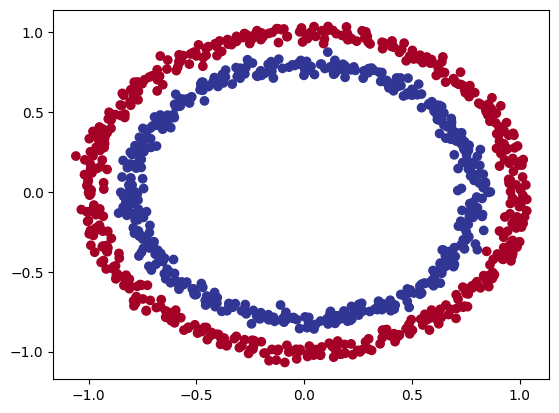

In [8]:
plt.scatter(X[: , 0] , X[: , 1] , c = y , cmap = plt.cm.RdYlBu)

1.1 Check Input and Output Shape

In [9]:
X.shape , y.shape

((1000, 2), (1000,))

First Example of features and labels

In [10]:
X_sample = X[0]
y_sample = y[0]

print(X_sample , y_sample)

[0.75424625 0.23148074] 1


1.2 Convert data into Tensors

In [11]:
import torch
torch.__version__

'2.4.1+cpu'

In [12]:
type(X) , X.dtype

(numpy.ndarray, dtype('float64'))

In [13]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)


In [14]:
type(X) , X.dtype

(torch.Tensor, torch.float32)

1.3 Split the data

In [15]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)

In [16]:
len(X_train) , len(y_train)

(800, 800)

In [17]:
len(X_test) , len(y_test)

(200, 200)

1.4 Build a model

In [18]:
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [19]:
class CircleModel(nn.Module):
    def __init__(self):
        super().__init__()

        self.layer_1 = nn.Linear(in_features=2 , out_features = 5)
        self.layer_2 = nn.Linear(in_features = 5 , out_features=1)
        
    def forward(self , X):
        return self.layer_2(self.layer_1(X)) # X -> layer_1 -> layer_2 -> output
    



model0 = CircleModel().to(device)

model0



CircleModel(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [20]:
model0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[-0.1267, -0.1294],
                      [-0.6915,  0.0297],
                      [ 0.4754,  0.6969],
                      [-0.4397, -0.3150],
                      [ 0.2824, -0.6378]])),
             ('layer_1.bias',
              tensor([-0.1994,  0.4344, -0.5352, -0.4847, -0.0764])),
             ('layer_2.weight',
              tensor([[ 0.1270,  0.2495, -0.2126,  0.0668,  0.4382]])),
             ('layer_2.bias', tensor([-0.4398]))])

In [21]:
device

'cpu'

In [22]:
next(model0.parameters()).device

device(type='cpu')

# Using nn.Sequential()

In [23]:
model0 = nn.Sequential(
    nn.Linear(2  , 5),
    nn.Linear(5 , 1)
).to(device)

model0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [24]:
model0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.3041,  0.6322],
                      [-0.2382, -0.3779],
                      [-0.3643,  0.3899],
                      [-0.5055,  0.1806],
                      [ 0.0691,  0.0492]])),
             ('0.bias', tensor([-0.3854, -0.0196,  0.3950, -0.5563,  0.4643])),
             ('1.weight',
              tensor([[-0.3402, -0.4367,  0.0841, -0.1382,  0.2632]])),
             ('1.bias', tensor([0.2170]))])

Make Prediction

In [25]:
with torch.inference_mode():

    untrained_preds = model0(X_test.to(device))
    len(untrained_preds)  , untrained_preds.shape

In [26]:
untrained_preds[:10] , y_test[:10]

(tensor([[0.5473],
         [0.5618],
         [0.5574],
         [0.5442],
         [0.6341],
         [0.6424],
         [0.6226],
         [0.6416],
         [0.5542],
         [0.5636]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

In [27]:
loss_fn = nn.BCEWithLogitsLoss() # Sigmoid Function builtin

optimizer = torch.optim.SGD(params =model0.parameters() , lr = 0.1)

In [28]:
# Calculate Accuracy


def accuracy(y_true , y_pred):
    correct = torch.eq(y_true , y_pred).sum().item()
    acc = (correct/len(y_pred)) * 100
    return acc



In [29]:
with torch.no_grad():
    y_logits = model0(X_test.to(device))[:5]
y_logits

tensor([[0.5473],
        [0.5618],
        [0.5574],
        [0.5442],
        [0.6341]])

In [30]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [31]:
y_pred_probs = torch.sigmoid(y_logits)
y_preds = torch.round(y_pred_probs)

TRAIN MODEL

In [32]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 100

X_train , y_train = X_train.to(device) , y_train.to(device)
X_test , y_test = X_test.to(device) , y_test.to(device)

for epoch in range(epochs):

    model0.train()

    # Forward

    y_logits = model0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    loss = loss_fn(y_logits , y_train)
    acc  = accuracy(y_train , y_pred)

    optimizer.zero_grad()

    loss.backward()
    optimizer.step()


    model0.eval()

    with torch.inference_mode():

        test_logits = model0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        test_loss = loss_fn(test_logits , y_test)

        test_acc = accuracy(y_test , test_pred)

    
    if epoch%10 == 0:
        print(f"Epoch : {epoch} | Loss: {loss: .2f} | Acc: {acc:.3f} | Test Loss: {test_loss: .3f} | Test Acc: {test_acc}")








Epoch : 0 | Loss:  0.74 | Acc: 50.000 | Test Loss:  0.731 | Test Acc: 50.0
Epoch : 10 | Loss:  0.71 | Acc: 50.000 | Test Loss:  0.707 | Test Acc: 50.0
Epoch : 20 | Loss:  0.70 | Acc: 50.000 | Test Loss:  0.699 | Test Acc: 50.0
Epoch : 30 | Loss:  0.69 | Acc: 50.000 | Test Loss:  0.696 | Test Acc: 50.0
Epoch : 40 | Loss:  0.69 | Acc: 50.000 | Test Loss:  0.695 | Test Acc: 50.0
Epoch : 50 | Loss:  0.69 | Acc: 59.500 | Test Loss:  0.695 | Test Acc: 54.50000000000001
Epoch : 60 | Loss:  0.69 | Acc: 53.375 | Test Loss:  0.695 | Test Acc: 48.0
Epoch : 70 | Loss:  0.69 | Acc: 51.875 | Test Loss:  0.695 | Test Acc: 46.0
Epoch : 80 | Loss:  0.69 | Acc: 51.875 | Test Loss:  0.695 | Test Acc: 46.5
Epoch : 90 | Loss:  0.69 | Acc: 51.875 | Test Loss:  0.695 | Test Acc: 47.0


Make Prediction

In [33]:
import requests
from pathlib import Path

# Download Helper function from Learn Pytorch repo
if Path("helper_function.py").is_file():
    print("It already exists")
else:
    print("Downloading Helper Function")
    # Use the raw URL to download the file
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")

    if request.status_code == 200:
        with open("helper_function.py", "wb") as f:
            f.write(request.content)
        print("Download complete.")
    else:
        print(f"Failed to download file. Status code: {request.status_code}")


It already exists


Using Non Linear Activation Function

In [34]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_circles
import torch


In [35]:
X , y = make_circles(1000 , noise=0.04 , random_state = 32)

In [36]:
X.shape , y.shape

((1000, 2), (1000,))

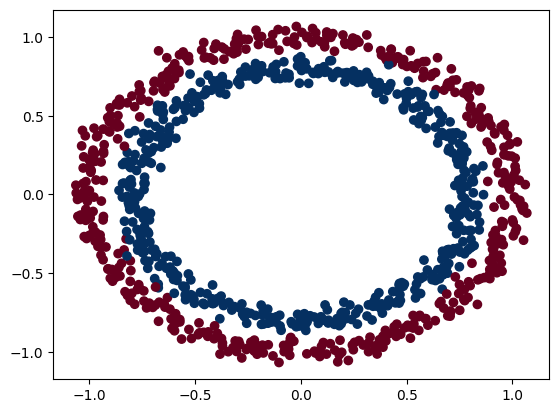

In [37]:
plt.scatter(X[: , 0] , X[: , 1] , c = y , cmap = plt.cm.RdBu)

In [38]:
X , X.dtype

(array([[-0.0733402 ,  0.74188676],
        [-0.50533388,  0.52196175],
        [-0.42116452, -0.69026065],
        ...,
        [ 0.27266564, -0.72948152],
        [ 0.53369019,  0.47358908],
        [-0.78403893,  0.2533651 ]]),
 dtype('float64'))

In [39]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [40]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test1= train_test_split(X , y ,test_size = 0.2 , random_state=32)

In [41]:
y_train.shape , y_test1.shape

(torch.Size([800]), torch.Size([200]))

In [42]:
X_train.shape , X_test.shape

(torch.Size([800, 2]), torch.Size([200, 2]))

In [43]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [44]:
X_train.shape , X_train.dtype

(torch.Size([800, 2]), torch.float32)

In [45]:
from torch import nn

class NonLinearModel(nn.Module):
    def __init__(self):
        super().__init__()

        self.layer1 = nn.Linear(2 , 32)
        self.layer2 = nn.Linear(32 , 64)
        self.layer3 = nn.Linear(64 , 1)
        self.relu = nn.ReLU()
    
    def forward(self , x):
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.layer3(x)
        # return self.layer3((self.relu(self.layer2(self.relu(self.layer1(x))))))
        return x
model = NonLinearModel()
model.to(device)

NonLinearModel(
  (layer1): Linear(in_features=2, out_features=32, bias=True)
  (layer2): Linear(in_features=32, out_features=64, bias=True)
  (layer3): Linear(in_features=64, out_features=1, bias=True)
  (relu): ReLU()
)

In [46]:
next(model.parameters()).device

device(type='cpu')

In [47]:

def acc(y_true , y_pred):

    correct = torch.eq(y_true , y_pred).sum().item()

    acc = (correct / len(y_pred))*100
    return acc

In [48]:
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(model.parameters() , lr = 0.01)


In [49]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 100

X_train , y_train = X_train.to(device) , y_train.to(device)
X_test , y_test = X_test.to(device) , y_train.to(device)



for epoch in range(epochs):

    model.train()

    logits = model(X_train).squeeze()
    pred = torch.round(torch.sigmoid(logits))


    acc = accuracy(y_train , pred)
    loss = loss_fn(logits , y_train)
    
    optimizer.zero_grad()

    loss.backward()
    optimizer.step()

    model.eval()
    with torch.inference_mode():

        test_logits = model(X_test).squeeze()
        # print(test_logits.shape)
        test_pred = torch.round(torch.sigmoid(test_logits))
        
        # print(test_pred.shape)
        # print(y_test.shape)
        test_acc = accuracy(y_test1 , test_pred)
        test_loss = loss_fn(test_logits , y_test1)

    if epoch %10 ==0:
        print(f"Epoch : {epoch} | loss: {loss} | Acc: {acc} | Test_loss: {test_loss} | Test_acc: {test_acc}")



    

    

Epoch : 0 | loss: 0.6920412182807922 | Acc: 51.74999999999999 | Test_loss: 0.6992850303649902 | Test_acc: 43.0
Epoch : 10 | loss: 0.6919166445732117 | Acc: 51.74999999999999 | Test_loss: 0.6989244818687439 | Test_acc: 43.0
Epoch : 20 | loss: 0.6917961239814758 | Acc: 51.74999999999999 | Test_loss: 0.6985867023468018 | Test_acc: 43.0
Epoch : 30 | loss: 0.6916797757148743 | Acc: 51.74999999999999 | Test_loss: 0.6982699632644653 | Test_acc: 43.0
Epoch : 40 | loss: 0.691567063331604 | Acc: 51.74999999999999 | Test_loss: 0.6979720592498779 | Test_acc: 43.0
Epoch : 50 | loss: 0.691457986831665 | Acc: 51.74999999999999 | Test_loss: 0.6976920366287231 | Test_acc: 43.0
Epoch : 60 | loss: 0.6913515329360962 | Acc: 51.74999999999999 | Test_loss: 0.6974276900291443 | Test_acc: 43.0
Epoch : 70 | loss: 0.6912487149238586 | Acc: 51.74999999999999 | Test_loss: 0.6971790790557861 | Test_acc: 43.0
Epoch : 80 | loss: 0.6911489963531494 | Acc: 51.74999999999999 | Test_loss: 0.6969444751739502 | Test_acc: 

In [87]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.datasets import make_circles

X , y = make_circles(10000 , noise=0.04 , random_state=42)


In [88]:
X[:5]

array([[ 0.06262915,  0.83303863],
       [ 1.03268848, -0.44888765],
       [-0.58854477,  0.78509809],
       [ 0.99707666, -0.3273843 ],
       [ 0.83182545, -0.5408862 ]])

In [89]:
dataset = pd.DataFrame({"X": X[: , 0] , "Y": X[: , 1] , "Labels": y})

In [90]:
dataset

,X,Y,Labels
0,0.062629,0.833039,1
1,1.032688,-0.448888,0
2,-0.588545,0.785098,0
3,0.997077,-0.327384,0
4,0.831825,-0.540886,0
...,...,...,...
9995,0.513303,0.671087,1
9996,0.795177,0.227683,1
9997,0.678666,0.371785,1
9998,0.475636,0.885796,0


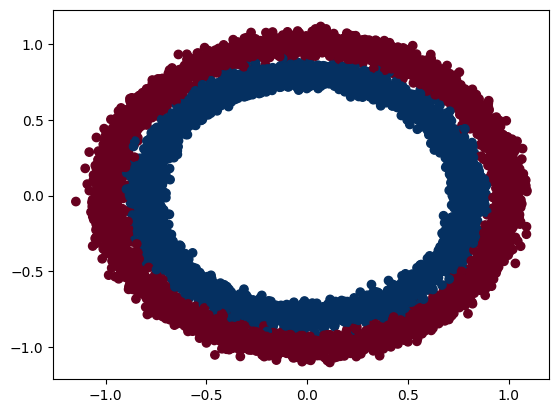

In [91]:
import matplotlib.pyplot as plt

plt.scatter(X[: , 0] , X[: , 1] , c = y , cmap = plt.cm.RdBu)

In [92]:
X.dtype


dtype('float64')

In [93]:
import torch 

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X.dtype



torch.float32

In [94]:
X_train , X_test , y_train , y_test  = train_test_split(X , y , test_size = 0.2 , random_state = 43)


In [95]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

(torch.Size([8000, 2]),
 torch.Size([2000, 2]),
 torch.Size([8000]),
 torch.Size([2000]))

In [96]:
device = "cuda" if torch.cuda.is_available() else "cpu"

device

'cpu'

In [97]:
from torch import nn

class ModelV2(nn.Module):
    def __init__(self):

        super().__init__()
        self.layer1 = nn.Linear(in_features=2 , out_features=10)
        self.layer2 = nn.Linear(10 , 10)
        self.layer3 = nn.Linear(10 , 1)
        self.relu = nn.ReLU()

    def forward(self , x):
        return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))
    

model3 = ModelV2().to(device)
model3 

ModelV2(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [98]:
model_3 = nn.Sequential(
    nn.Linear(2 , 10),
    nn.ReLU(),
    nn.Linear(10 , 10),
    nn.ReLU() , 
    nn.Linear(10 , 1)

    
    
    ).to(device)

model_3

Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=10, bias=True)
  (3): ReLU()
  (4): Linear(in_features=10, out_features=1, bias=True)
)

In [99]:
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(model3.parameters() , lr = 0.01)

In [103]:
torch.manual_seed(43)
torch.cuda.manual_seed(43)

X_train , y_train = X_train.to(device) , y_train.to(device)
X_test , y_test = X_test.to(device) , y_test.to(device)

epochs = 1000

for epoch in range(epochs):
    model_3.train()

    #Forward
    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    #Calcluate the loss

    loss = loss_fn(y_logits , y_train)
    acc = accuracy(y_true=y_train, 
                   y_pred=y_pred)
    
    #Optimizer
    optimizer.zero_grad()

    #loss
    loss.backward()

    #optimizer
    optimizer.step()


    #Test 
    model_3.eval()

    with torch.inference_mode():
        test_logits = model_3(X_test).squeeze()

        test_pred = torch.round(torch.sigmoid(test_logits))

        test_loss = loss_fn(test_logits , y_test)

        test_acc = accuracy(y_test , test_pred)

        if epoch%100 ==0:
            print(f"Epoch: {epochs}  | Loss: {loss}  | test_loss: {test_loss}  | Accuracy: {acc}")    

Epoch: 1000  | Loss: 0.7053796052932739  | test_loss: 0.705142080783844  | Accuracy: 50.1
Epoch: 1000  | Loss: 0.7053796052932739  | test_loss: 0.705142080783844  | Accuracy: 50.1
Epoch: 1000  | Loss: 0.7053796052932739  | test_loss: 0.705142080783844  | Accuracy: 50.1
Epoch: 1000  | Loss: 0.7053796052932739  | test_loss: 0.705142080783844  | Accuracy: 50.1
Epoch: 1000  | Loss: 0.7053796052932739  | test_loss: 0.705142080783844  | Accuracy: 50.1
Epoch: 1000  | Loss: 0.7053796052932739  | test_loss: 0.705142080783844  | Accuracy: 50.1
Epoch: 1000  | Loss: 0.7053796052932739  | test_loss: 0.705142080783844  | Accuracy: 50.1
Epoch: 1000  | Loss: 0.7053796052932739  | test_loss: 0.705142080783844  | Accuracy: 50.1
Epoch: 1000  | Loss: 0.7053796052932739  | test_loss: 0.705142080783844  | Accuracy: 50.1
Epoch: 1000  | Loss: 0.7053796052932739  | test_loss: 0.705142080783844  | Accuracy: 50.1


In [101]:
model3.state_dict()

OrderedDict([('layer1.weight',
              tensor([[-0.0651, -0.4292],
                      [ 0.5954, -0.2175],
                      [-0.4977, -0.5857],
                      [ 0.1286, -0.6139],
                      [ 0.3502,  0.1772],
                      [ 0.6211, -0.5179],
                      [ 0.0270,  0.0474],
                      [ 0.0531,  0.2911],
                      [-0.1025, -0.3166],
                      [ 0.4802, -0.4861]])),
             ('layer1.bias',
              tensor([-0.5555,  0.3198, -0.2488,  0.5505, -0.5207,  0.4772,  0.0884, -0.1219,
                       0.5120, -0.3121])),
             ('layer2.weight',
              tensor([[ 0.0528, -0.1083,  0.1121,  0.1294,  0.2661, -0.1684,  0.0795, -0.0238,
                        0.2312, -0.2091],
                      [-0.1085,  0.2317,  0.1234, -0.0853,  0.0990,  0.1164, -0.0955, -0.2551,
                       -0.2440,  0.1905],
                      [-0.0319,  0.1652, -0.2403,  0.2791,  0.0994, -0.0191

In [105]:
A = torch.arange(-10 , 10 , 1 , dtype = torch.float32)

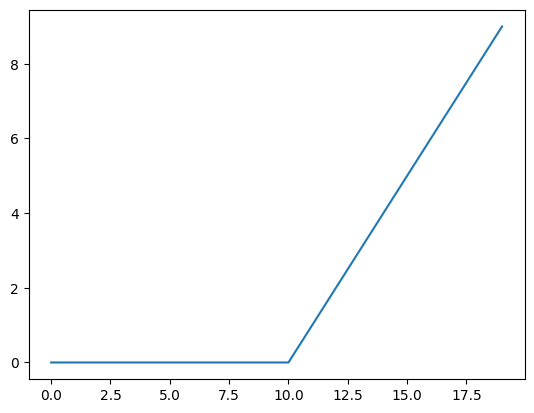

In [106]:
plt.plot(torch.relu(A))

In [107]:
def sigmoid(x):
    return 1 / (1+ torch.exp(-x))

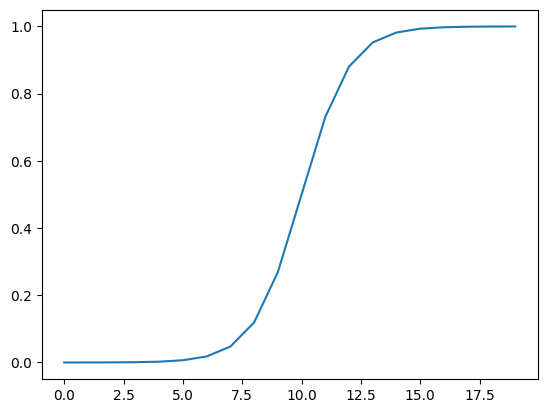

In [108]:
plt.plot(sigmoid(A))

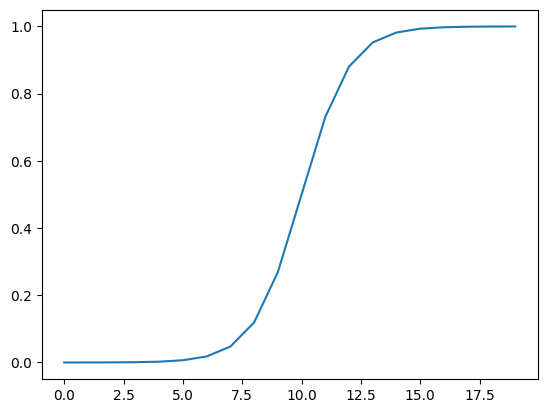

In [109]:
plt.plot(torch.sigmoid(A))